# Welcome to MSOMA Bootcamp 2019

Today is the first day of this year's MSOMA bootcamp.

## Introduction [Monicah]

1. What is the MSOMA bootcamp?
2. What should you expect to learn
3. Pre-Bootcamp Assignment
4. Facilitators

## Ice Breaker [Rosianah]

### String Exercises

In [1]:
# 1 - Concatenation, Indexing, and Slicing

# Exercise 1
# Display the number of letters in the string
my_word = "antidisestablishmentarianism"

#Solution
print(len(my_word))


# Exercise 2
# Concatenate two strings together
string_left = "bat"
string_right = "man"

#Solution
print(string_left + string_right)


# Exercise 3
# Display two strings together, with a space in between
string_one = "heebie"
string_two = "jeebies"

#Solution
print(string_one, string_two)


# Exercise 3
# Display two strings together, with a space in between
string_one = "heebie"
string_two = "jeebies"

#Solution
print(string_one + " " + string_two)


# Exercise 4
# Use subscripting to display part of a string

#Solution
print("bazinga"[2:6])

28
batman
heebie jeebies
heebie jeebies
zing


## Exploratory Data Analysis


1. Visualize the data e.g. What variables are corelated with what variables. Helps in feature selection
2. Handling outliers/anomalies
3. Handling missing values
4. Scale the data/Normalization
5. Hypothesis testing

In [105]:
#Create a random dataset
np.random.seed(33454)
animals = ['cat', 'dog', 'cow', 'sheep']

df = pd.DataFrame({'animal': np.array([random.choice(animals) for x in range(20)]), 
                          'weight': np.random.randint(1, 200, 20),
                          'height': np.random.randint(1, 200, 20),
                          'length': np.random.randint(1, 200, 20)
                  })

print (df)

   animal  height  length  weight
0     cat     197      79       4
1     dog      50     124     109
2     cow      87      41     157
3   sheep      60     199     137
4     cat     138     100      19
5     cat      83     143      86
6     dog      23      58      55
7   sheep     145      18      78
8     cat      39      65     132
9     dog     146     197      37
10    dog      55     156     164
11    cat     154     157      32
12    cat     195      44     132
13    cat     148     188      67
14    cow     173      52      95
15    dog     102      21     124
16    cat      61      56      93
17    dog      21      25      84
18    cat     165     163      21
19    cow      52     126      34


Visualize

In [106]:
df.shape

(20, 4)

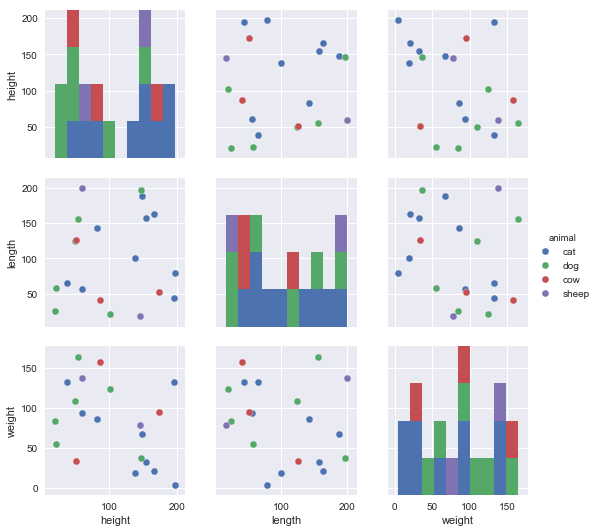

In [108]:
g = sns.pairplot(df, hue="animal")

Outlier Detection

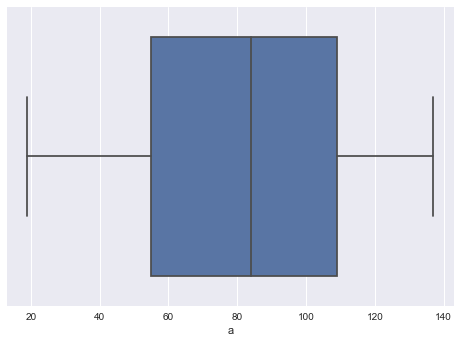

In [76]:
sns.boxplot(x=df['a'])

In [71]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print (df)

      a    b     c
1   109   50   124
3   137   60  1990
4    19  138   100
5    86   83   143
6    55   23    58
7    78  145    18
8   132   39    65
9    37  146  1970
13   67  148  1880
15  124  102    21
16   93   61    56
17   84   21    25
19   34   52   126


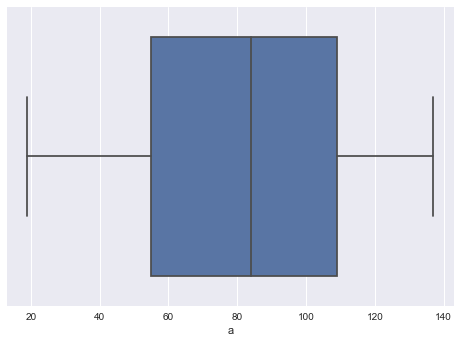

In [72]:
sns.boxplot(x=df['a'])

## Exercise: Remove outliers from the Boston housing prices dataset

In [58]:
#Starter Code

boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


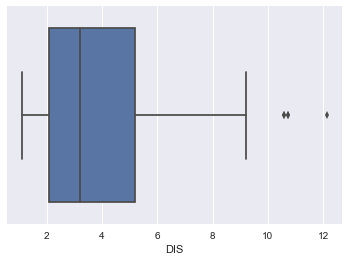

In [30]:
sns.boxplot(x=boston_df['DIS'])

In [31]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


CRIM         3.565378
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [32]:
print(boston_df.shape)
boston_df_out = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(506, 13)


(274, 13)

Handling Missing Values
1. Remove/delete missing values
2. Imputing new values

In [3]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
"toy": [np.nan, 'Batmobile', 'Bullwhip'],
"born": [pd.NaT, pd.Timestamp("1940-04-25"),
pd.NaT]})

df


,born,name,toy
0,NaT,Alfred,NaN
1,1940-04-25,Batman,Batmobile
2,NaT,Catwoman,Bullwhip


In [5]:
# drop rows with missing values
df.dropna(inplace=True)
df

,born,name,toy
1,1940-04-25,Batman,Batmobile


Imputing new values. As a rule of thumb, if you impute values in training, you have to impute them later while testing and applying the model.

In [14]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
[3, 4, np.nan, 1],
[np.nan, np.nan, 1, 5],
[np.nan, 3, np.nan, 4]],
columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,1.0,5
3,NaN,3.0,NaN,4


In [15]:
#df.fillna(df.mean(), inplace=True) #Replace with the mean
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,1.0,5
3,0.0,3.0,0.0,4


Normalization

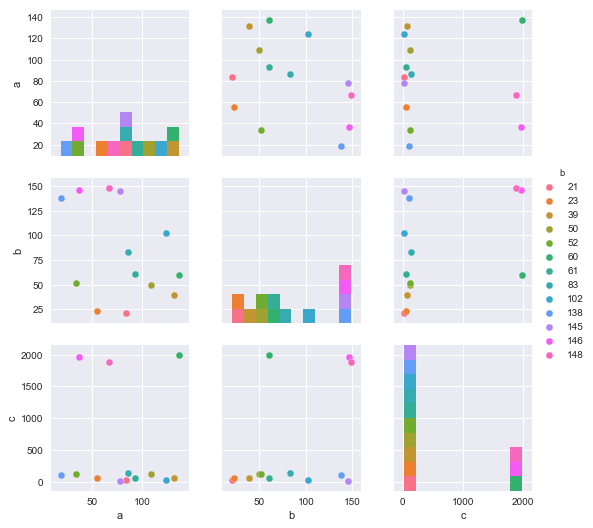

In [81]:
#sns.distplot(df['c'])
sns.pairplot(df, hue="b", palette="husl")


In [ ]:
# Normalize total_bedrooms column
normalized_X = preprocessing.normalize([x_array])
sns.distplot(normalized_X)

In [39]:
import numpy as np
# Get dataset
df = pd.read_csv("datasets/housing.csv", sep=",")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [40]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [43]:
#x_array = np.array(df['total_bedrooms'])
np.any(np.isnan(np.array(df['total_bedrooms']))) #Test whether any of the elements is NaN

True

In [44]:
df.dropna(inplace=True) #remove nans

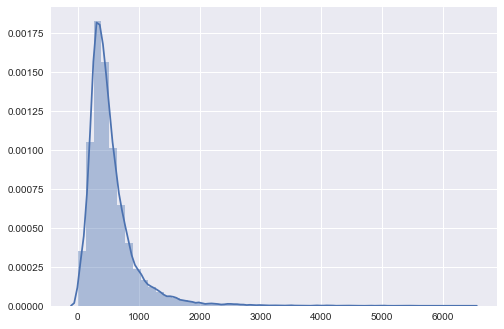

In [45]:
x_array = np.array(df['total_bedrooms'])
sns.distplot(x_array)

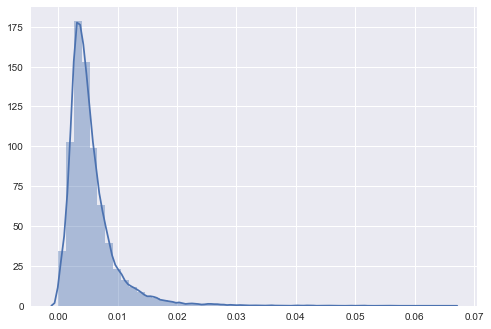

In [46]:
# Normalize total_bedrooms column
normalized_X = preprocessing.normalize([x_array])
sns.distplot(normalized_X)

1. An Independent Samples t-test compares the means for two groups.
2. A Paired sample t-test compares means from the same group at different times (say, one year apart).
3. A One sample t-test tests the mean of a single group against a known mean.

A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

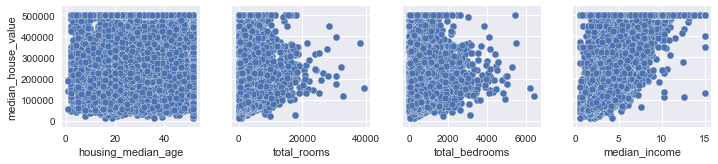

In [48]:

g = sns.pairplot(df, x_vars=['housing_median_age','total_rooms','total_bedrooms','median_income'],y_vars='median_house_value')

In [53]:
from scipy import stats
stats.ttest_ind(df['total_rooms'],df['median_house_value'])

Ttest_indResult(statistic=-252.85022025246747, pvalue=0.0)

In [56]:
stats.ttest_ind(df['population'],df['median_house_value'])

Ttest_indResult(statistic=-254.3835378762328, pvalue=0.0)